In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:

# Read in the eigenvectors, produced by PLINK PCA
eigenvec = pd.read_csv('PCA.eigenvec', header=None, sep=' ')

# Set the index to the values in column 1
eigenvec.index = eigenvec.iloc[:, 1]

# Drop the first column and set column names
eigenvec = eigenvec.iloc[:, 2:]
eigenvec.columns = [f'PC_{i}' for i in range(1, 21)]  # Adjust range to match the actual number of columns

# Display the modified DataFrame
print(eigenvec.columns)
print(eigenvec.PC_1)

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9',
       'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17',
       'PC_18', 'PC_19', 'PC_20'],
      dtype='object')
1
HG00096   -0.010225
HG00097   -0.010532
HG00099   -0.010675
HG00100   -0.009632
HG00101   -0.010273
             ...   
NA21137   -0.010643
NA21141   -0.010758
NA21142   -0.010830
NA21143   -0.010936
NA21144   -0.010751
Name: PC_1, Length: 2504, dtype: float64


In [3]:
# Read in the PED data (contains information about samples)
PED = pd.read_csv('20130606_g1k.ped', header=0, sep='\t')
PED = PED.set_index('Individual_ID')

# Set population labels
population_levels = ["ACB", "ASW", "ESN", "GWD", "LWK", "MSL", "YRI",
                      "CLM", "MXL", "PEL", "PUR",
                      "CDX", "CHB", "CHS", "JPT", "KHV",
                      "CEU", "FIN", "GBR", "IBS", "TSI",
                      "BEB", "GIH", "ITU", "PJL", "STU"]

# Set population labels in the PED DataFrame
PED['Population'] = pd.Categorical(PED['Population'], categories=population_levels, ordered=True)

# Filter the PED DataFrame based on matching individuals
matching_individuals = PED.index[PED.index.isin(eigenvec.index)].tolist()
PED_filtered = PED.loc[matching_individuals]
print(PED_filtered)
print(PED_filtered.index)

              Family_ID Paternal_ID Maternal_ID  Gender  Phenotype Population  \
Individual_ID                                                                   
HG01879            BB01           0           0       1          0        ACB   
HG01880            BB01           0           0       2          0        ACB   
HG01882            BB02           0           0       1          0        ACB   
HG01883            BB02           0           0       2          0        ACB   
HG01885            BB03           0           0       1          0        ACB   
...                 ...         ...         ...     ...        ...        ...   
NA19236            Y116           0           0       1          0        YRI   
NA19238            Y117           0           0       2          0        YRI   
NA19239            Y117           0           0       1          0        YRI   
NA19247            Y120           0           0       2          0        YRI   
NA19248            Y120     

In [4]:
# Extract PC1 and PC2 for plotting
pc1 = eigenvec['PC_1']
pc2 = eigenvec['PC_2']

# Set population colors
population_colors = {
    'ACB': 'yellow',
    'ASW': 'forestgreen',
    'ESN': 'grey',
    'GWD': 'royalblue',
    'LWK': 'black',
    'MSL': 'red',
    'YRI': 'purple',
    'CLM': 'orange',
    'MXL': 'brown',
    'PEL': 'pink',
    'PUR': 'olive',
    'CDX': 'cyan',
    'CHB': 'lime',
    'CHS': 'teal',
    'JPT': 'magenta',
    'KHV': 'violet',
    'CEU': 'blue',
    'FIN': 'indigo',
    'GBR': 'lightcoral',
    'IBS': 'darkslategray',
    'TSI': 'mediumseagreen',
    'BEB': 'gold',
    'GIH': 'navajowhite',
    'ITU': 'rosybrown',
    'PJL': 'lightblue',
    'STU': 'mediumorchid',
}

# Map population labels to colors
col = PED_filtered['Population'].map(population_colors)

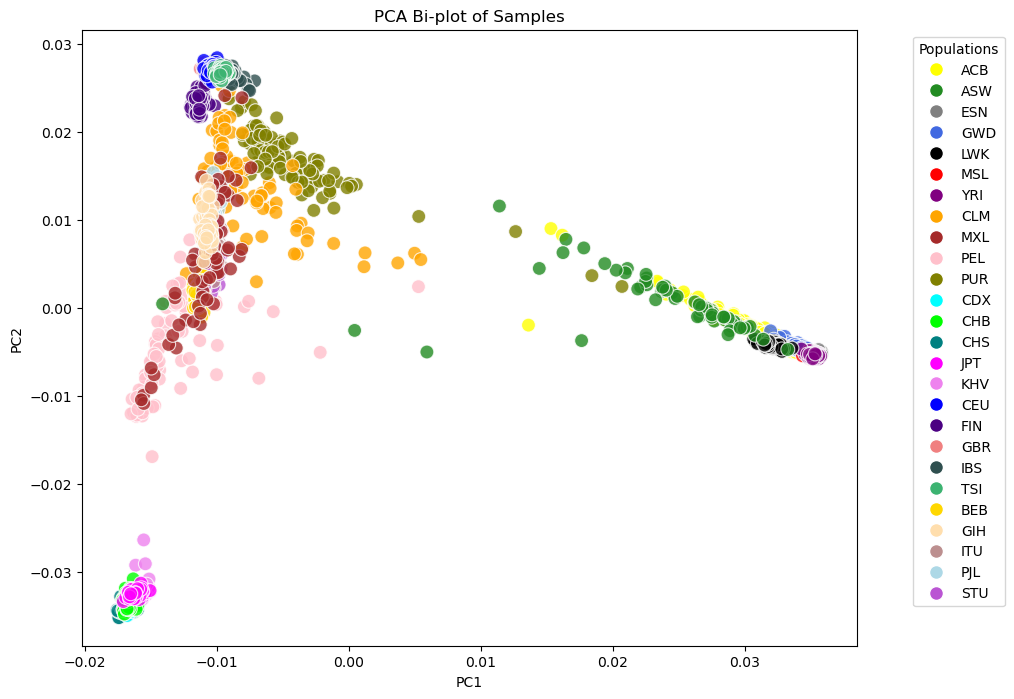

In [5]:
# Plot PCA results using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pc1, y=pc2, hue=PED_filtered['Population'], palette=population_colors, s=100, alpha=0.8)

# Customize the plot
plt.title('PCA Bi-plot of Samples')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Create legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=pop)
                   for pop, color in population_colors.items()]
plt.legend(handles=legend_elements, title='Populations', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()